In [324]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Read csv file

In [325]:
dataset = pd.read_csv("dataset.csv", na_values=["", " "])
copy_dataset_inference = dataset.copy()

In [327]:
dataset

,DateTime,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod
0,4/1/2013 03:00,12.6,12.6,81.0,12.6,76.0,1008.0,245.0,1.94,0.028169
1,4/1/2013 04:00,13.0,13.0,91.0,13.0,78.0,1009.0,215.0,2.28,0.028169
2,4/1/2013 05:00,12.9,12.9,98.0,12.9,80.0,1009.0,194.0,2.17,0.021127
3,4/1/2013 06:00,12.7,12.7,100.0,12.7,81.0,1009.0,179.0,1.97,0.070423
4,4/1/2013 07:00,13.0,13.0,96.0,13.0,80.0,1008.0,162.0,2.08,0.035211
...,...,...,...,...,...,...,...,...,...,...
36350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the total records

In [328]:
with open("dataset.csv", "r") as f:
    rows = f.readlines()
    print(f"# of total rows in file: {len(rows)}")

# of total rows in file: 36356


In [329]:
# Remove NaNs

In [330]:
empty_rows = dataset[dataset.isna().all(axis=1)]
print(f"Number of fully empty rows: {len(empty_rows)}")
print(f"Original shape of dataaset:", dataset.shape)
dataset.dropna(how='all', inplace=True)
print(f"True shape after removing nans:", dataset.shape)

Number of fully empty rows: 2928
Original shape of dataaset: (36355, 10)
True shape after removing nans: (33427, 10)


In [331]:
dataset

,DateTime,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod
0,4/1/2013 03:00,12.6,12.6,81.0,12.6,76.0,1008.0,245.0,1.94,0.028169
1,4/1/2013 04:00,13.0,13.0,91.0,13.0,78.0,1009.0,215.0,2.28,0.028169
2,4/1/2013 05:00,12.9,12.9,98.0,12.9,80.0,1009.0,194.0,2.17,0.021127
3,4/1/2013 06:00,12.7,12.7,100.0,12.7,81.0,1009.0,179.0,1.97,0.070423
4,4/1/2013 07:00,13.0,13.0,96.0,13.0,80.0,1008.0,162.0,2.08,0.035211
...,...,...,...,...,...,...,...,...,...,...
33422,9/30/2017 19:00,15.5,15.5,100.0,15.5,95.0,1015.0,340.0,2.69,0.429577
33423,9/30/2017 20:00,15.4,15.4,100.0,15.4,95.0,1016.0,341.0,2.69,0.542254
33424,9/30/2017 21:00,15.3,15.3,100.0,15.3,94.0,1016.0,341.0,2.75,0.309859
33425,9/30/2017 22:00,14.7,14.7,100.0,14.7,94.0,1016.0,333.0,3.11,0.253521


In [332]:
dataset["AppTemperature"].values

array([12.6, 13. , 12.9, ..., 15.3, 14.7, 14.4])

In [333]:
dataset.head(5)

,DateTime,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod
0,4/1/2013 03:00,12.6,12.6,81.0,12.6,76.0,1008.0,245.0,1.94,0.028169
1,4/1/2013 04:00,13.0,13.0,91.0,13.0,78.0,1009.0,215.0,2.28,0.028169
2,4/1/2013 05:00,12.9,12.9,98.0,12.9,80.0,1009.0,194.0,2.17,0.021127
3,4/1/2013 06:00,12.7,12.7,100.0,12.7,81.0,1009.0,179.0,1.97,0.070423
4,4/1/2013 07:00,13.0,13.0,96.0,13.0,80.0,1008.0,162.0,2.08,0.035211


<AxesSubplot:>

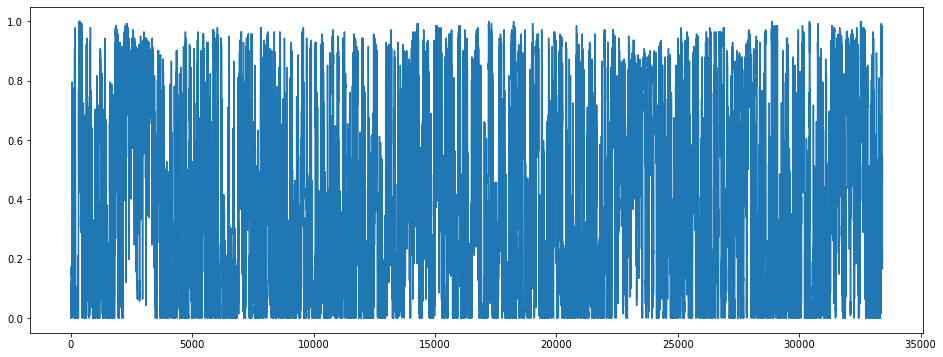

In [334]:
#plot any field [column]
dataset["Prod"].plot(figsize=(16,6))

In [335]:
df = dataset.columns
df

Index(['DateTime', 'AppTemperature', 'Temperature', 'CloudCover', 'DewPoint',
       'Humidity', 'Pressure', 'WindBearing', 'WindSpeed', 'Prod'],
      dtype='object')

In [ ]:
# PLotting each attribute of the dataset to make trend analysis

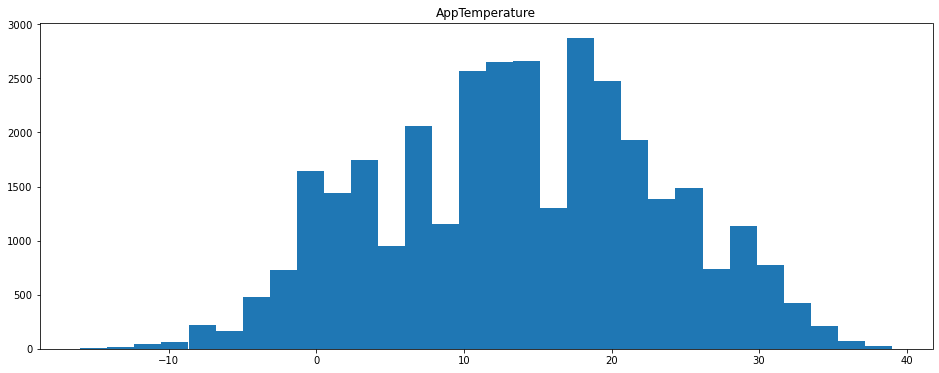

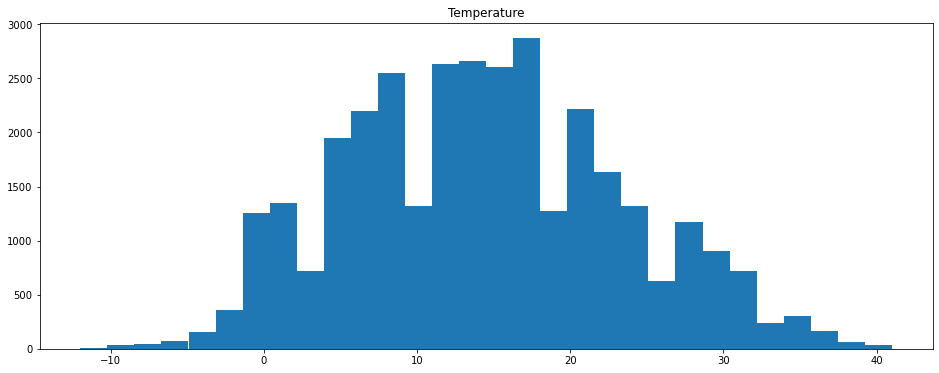

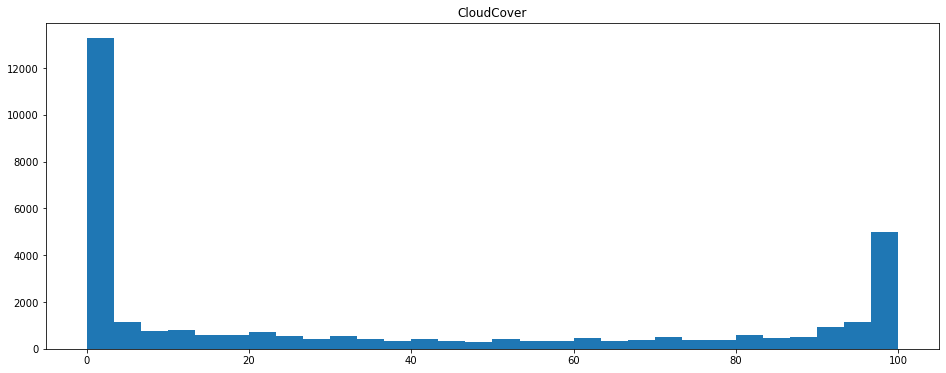

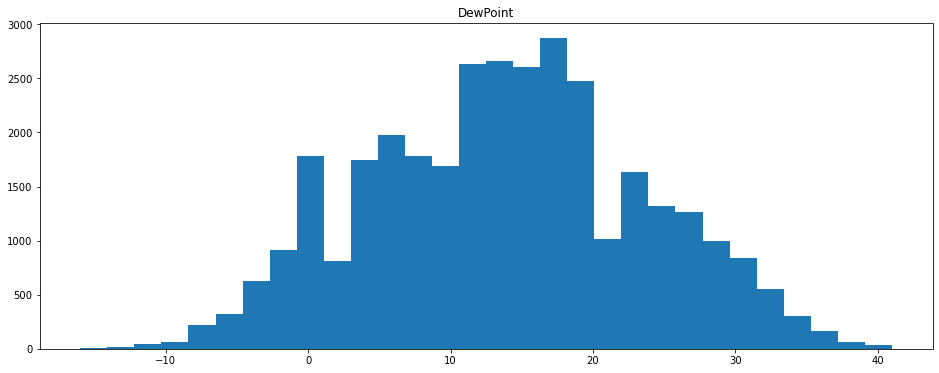

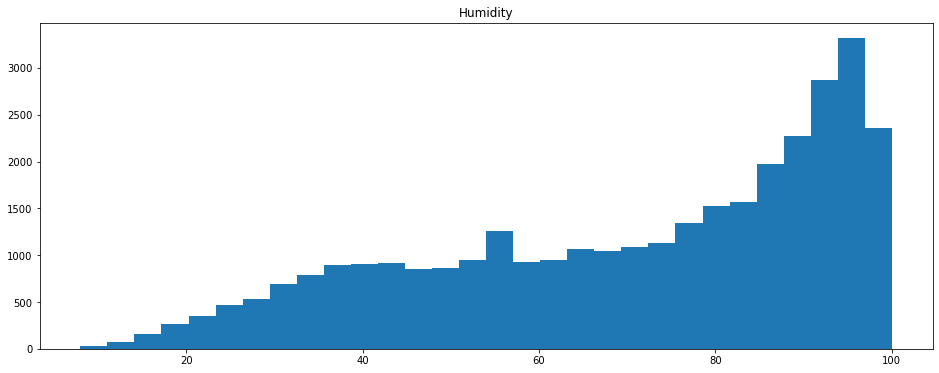

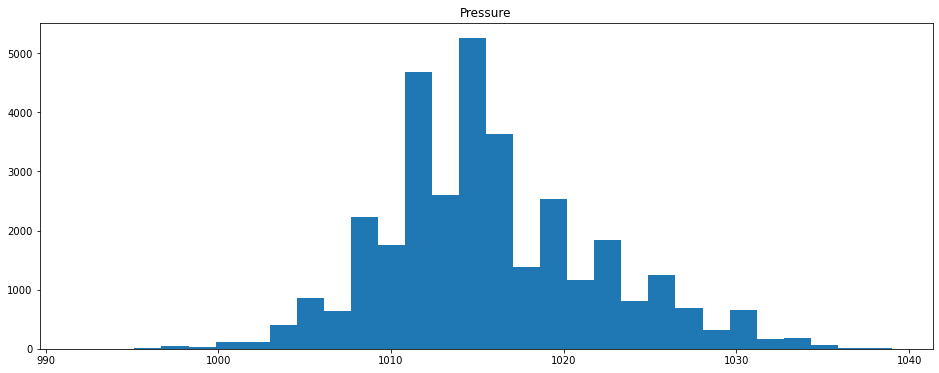

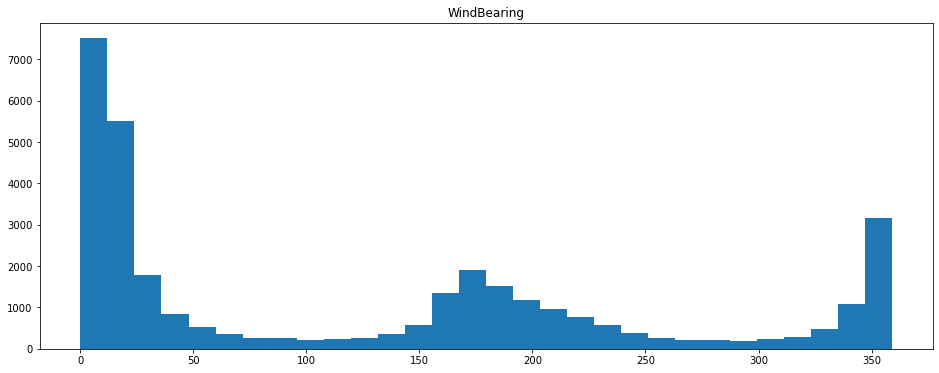

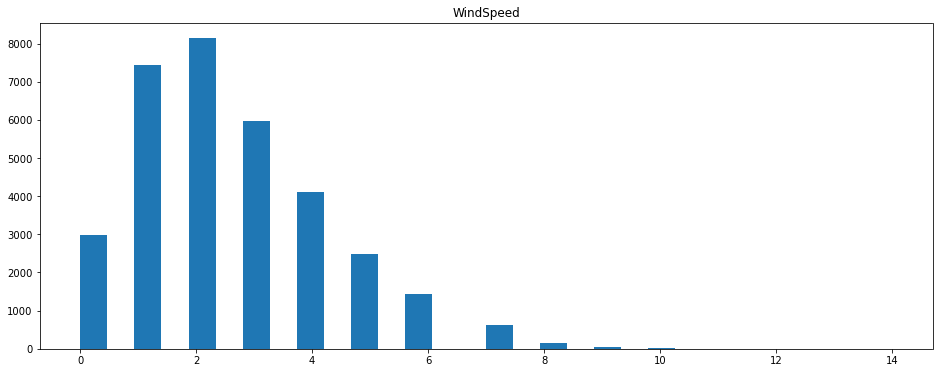

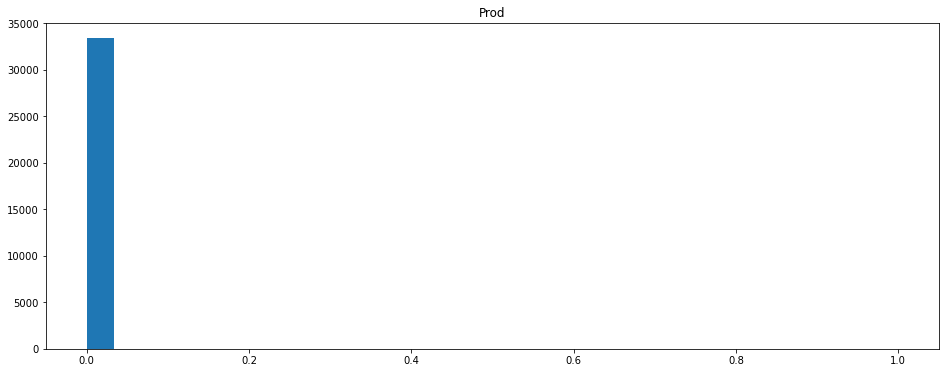

In [336]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

columns = dataset.columns[1:]

for column in columns:
    plt.figure()
    
    # Plot using matplotlib directly
    plt.hist(dataset[column].dropna().astype(int), bins=30)
    plt.title(f'{column}')
    plt.show()

In [337]:
#0th row
dataset.iloc[0]

DateTime          4/1/2013 03:00
AppTemperature              12.6
Temperature                 12.6
CloudCover                  81.0
DewPoint                    12.6
Humidity                    76.0
Pressure                  1008.0
WindBearing                245.0
WindSpeed                   1.94
Prod                    0.028169
Name: 0, dtype: object

In [338]:
# DateTime Parsing for Time Series Analysis

In [339]:
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'], format='%m/%d/%Y %H:%M')
dataset.set_index('DateTime', inplace=True)
dataset['Hour'] = dataset.index.hour
dataset['Day'] = dataset.index.day
dataset['Weekday'] = dataset.index.dayofweek  # 0 = Monday
dataset['Month'] = dataset.index.month
dataset['Year'] = dataset.index.year

In [340]:
duplicates = dataset.index.duplicated()
print(f"Number of duplicate timestamps: {duplicates.sum()}")

Number of duplicate timestamps: 2


In [341]:
dataset.head(5)

,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour,Day,Weekday,Month,Year
DateTime,,,,,,,,,,,,,,
2013-04-01 03:00:00,12.6,12.6,81.0,12.6,76.0,1008.0,245.0,1.94,0.028169,3,1,0,4,2013
2013-04-01 04:00:00,13.0,13.0,91.0,13.0,78.0,1009.0,215.0,2.28,0.028169,4,1,0,4,2013
2013-04-01 05:00:00,12.9,12.9,98.0,12.9,80.0,1009.0,194.0,2.17,0.021127,5,1,0,4,2013
2013-04-01 06:00:00,12.7,12.7,100.0,12.7,81.0,1009.0,179.0,1.97,0.070423,6,1,0,4,2013
2013-04-01 07:00:00,13.0,13.0,96.0,13.0,80.0,1008.0,162.0,2.08,0.035211,7,1,0,4,2013


In [ ]:
# Cyclical Encoding for Timestamp-based feature extraction

In [342]:
dataset['Hour_sin'] = np.sin(2 * np.pi * dataset['Hour'] / 24)
dataset['Hour_cos'] = np.cos(2 * np.pi * dataset['Hour'] / 24)

dataset['Day_sin'] = np.sin(2 * np.pi * dataset['Day'] / 31)
dataset['Day_cos'] = np.cos(2 * np.pi * dataset['Day'] / 31)

dataset['Weekday_sin'] = np.sin(2 * np.pi * dataset['Weekday'] / 7)
dataset['Weekday_cos'] = np.cos(2 * np.pi * dataset['Weekday'] / 7)

dataset['Month_sin'] = np.sin(2 * np.pi * dataset['Month'] / 12)
dataset['Month_cos'] = np.cos(2 * np.pi * dataset['Month'] / 12)
dataset.drop(columns=['Hour', 'Day', 'Weekday', 'Month', 'Year'], inplace=True)
dataset

,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod,Year,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos
DateTime,,,,,,,,,,,,,,,,,,
2013-04-01 03:00:00,12.6,12.6,81.0,12.6,76.0,1008.0,245.0,1.94,0.028169,2013,0.707107,7.071068e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
2013-04-01 04:00:00,13.0,13.0,91.0,13.0,78.0,1009.0,215.0,2.28,0.028169,2013,0.866025,5.000000e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
2013-04-01 05:00:00,12.9,12.9,98.0,12.9,80.0,1009.0,194.0,2.17,0.021127,2013,0.965926,2.588190e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
2013-04-01 06:00:00,12.7,12.7,100.0,12.7,81.0,1009.0,179.0,1.97,0.070423,2013,1.000000,6.123234e-17,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
2013-04-01 07:00:00,13.0,13.0,96.0,13.0,80.0,1008.0,162.0,2.08,0.035211,2013,0.965926,-2.588190e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30 19:00:00,15.5,15.5,100.0,15.5,95.0,1015.0,340.0,2.69,0.429577,2017,-0.965926,2.588190e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16
2017-09-30 20:00:00,15.4,15.4,100.0,15.4,95.0,1016.0,341.0,2.69,0.542254,2017,-0.866025,5.000000e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16
2017-09-30 21:00:00,15.3,15.3,100.0,15.3,94.0,1016.0,341.0,2.75,0.309859,2017,-0.707107,7.071068e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16


In [ ]:
# Heatmap analysis to check correlations 

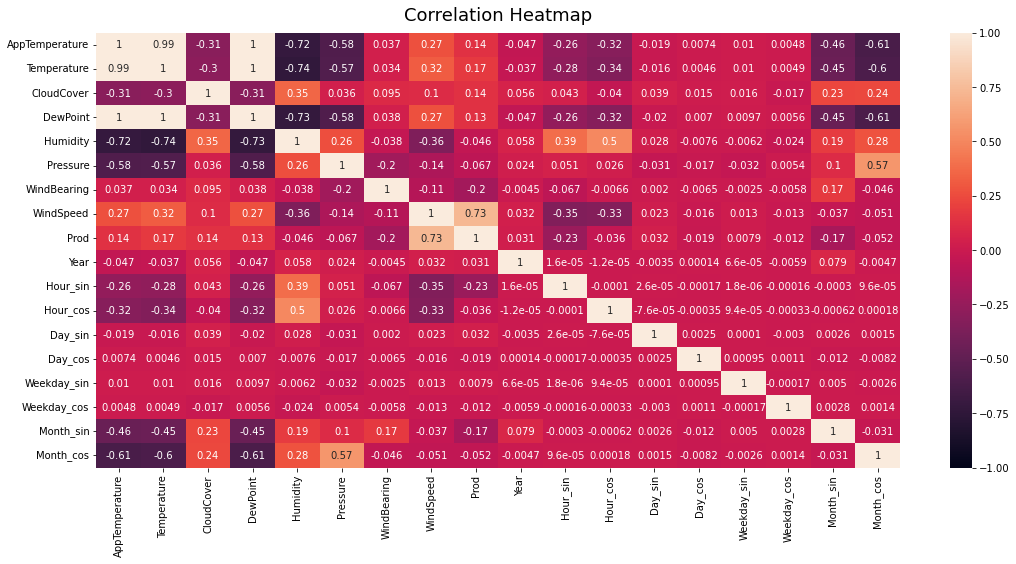

In [343]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(dataset[1:].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=600, bbox_inches='tight')

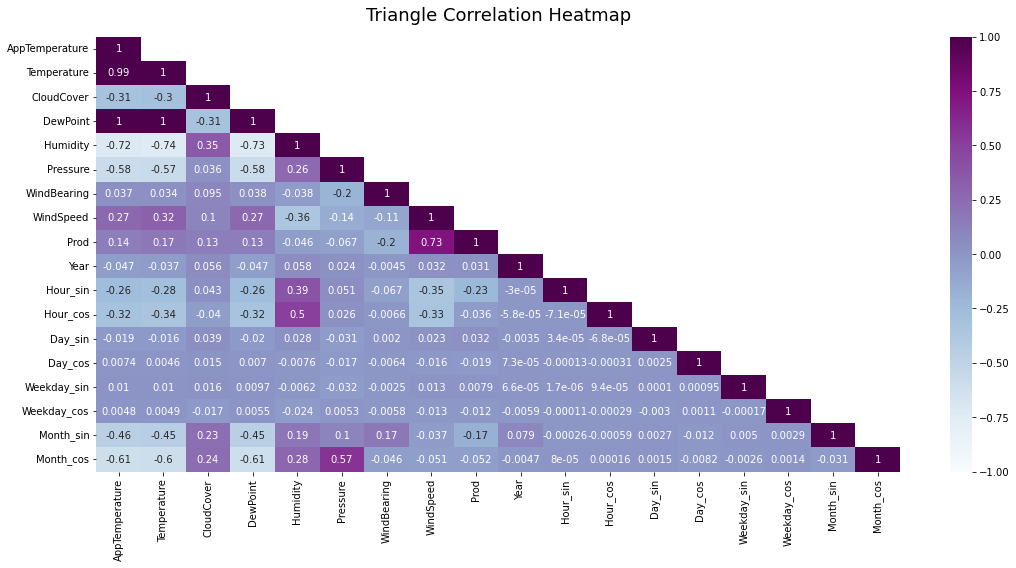

In [344]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(dataset.corr(), dtype=bool), k=1)
heatmap = sns.heatmap(dataset.corr(), mask=mask, vmin=-1, vmax=1, cmap="BuPu", annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.savefig('triangle-heatmap.png', dpi=600, bbox_inches='tight')

In [345]:
# Since DewPoint has a high correlation with AppTemperature and Temperature, 
# removing it will help to avoid multicollinearity during training, 
# ensuring that the training model isn't affected by redundant features.

In [346]:
dataset.drop('DewPoint', axis=1, inplace=True)
dataset.drop('AppTemperature', axis=1, inplace=True)

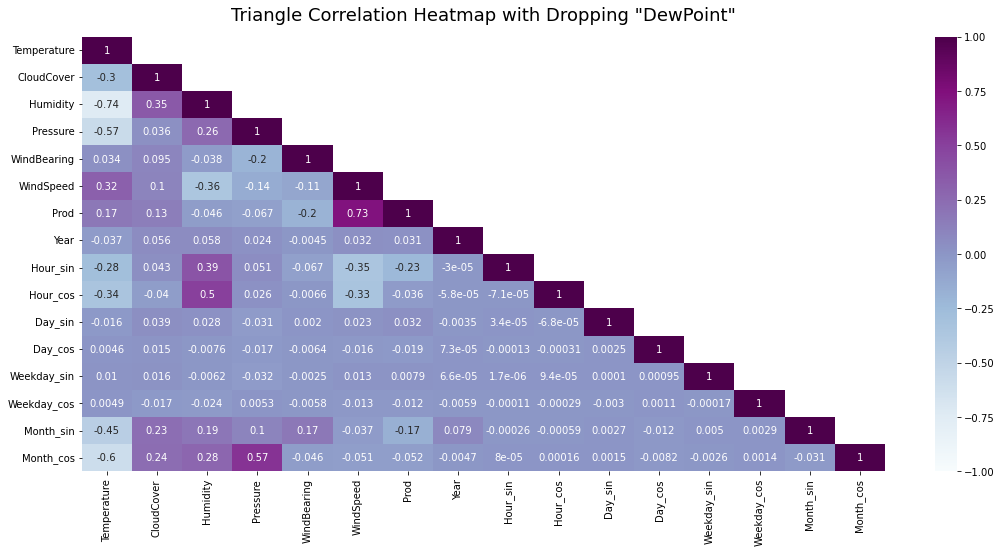

In [347]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(dataset.corr(), dtype=bool), k=1)
heatmap = sns.heatmap(dataset.corr(), mask=mask, vmin=-1, vmax=1, cmap="BuPu", annot=True)
heatmap.set_title('Triangle Correlation Heatmap with Dropping "DewPoint"', fontdict={'fontsize':18}, pad=16);

count    33427.000000
mean        14.777306
std          9.048304
min        -12.100000
25%          8.100000
50%         14.500000
75%         20.800000
max         41.400000
Name: Temperature, dtype: float64

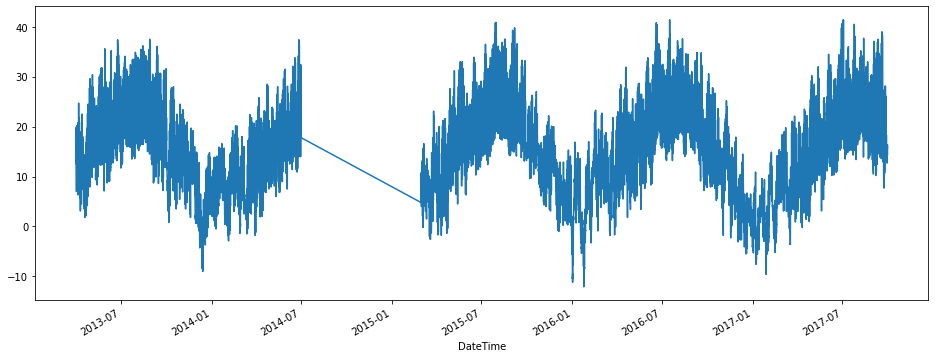

In [348]:
dataset["Temperature"].plot()
dataset['Temperature'].describe()

count    33427.000000
mean        36.806773
std         40.079076
min          0.000000
25%          0.000000
50%         17.000000
75%         81.000000
max        100.000000
Name: CloudCover, dtype: float64

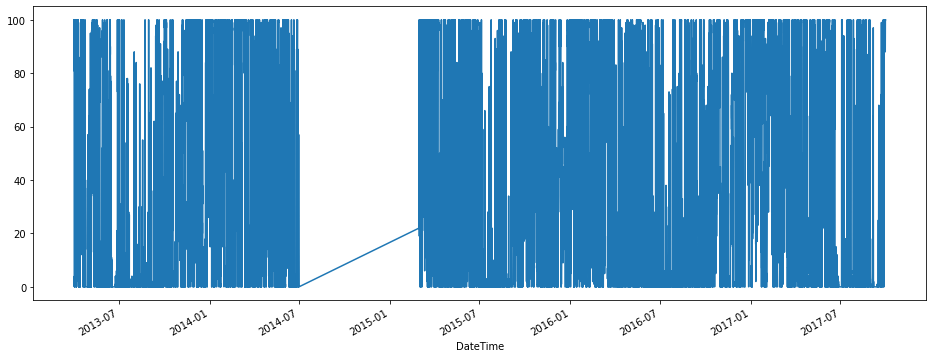

In [349]:
dataset["CloudCover"].plot()
dataset["CloudCover"].describe()

count    33427.000000
mean        70.410147
std         22.878633
min          8.000000
25%         52.000000
50%         77.000000
75%         91.000000
max        100.000000
Name: Humidity, dtype: float64

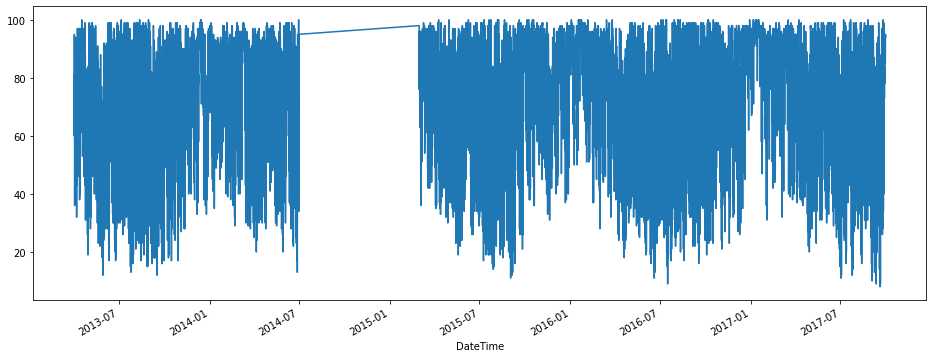

In [350]:
dataset["Humidity"].plot()
dataset["Humidity"].describe()

count    33427.000000
mean      1015.694289
std          6.291406
min        992.000000
25%       1011.000000
50%       1015.000000
75%       1020.000000
max       1039.000000
Name: Pressure, dtype: float64

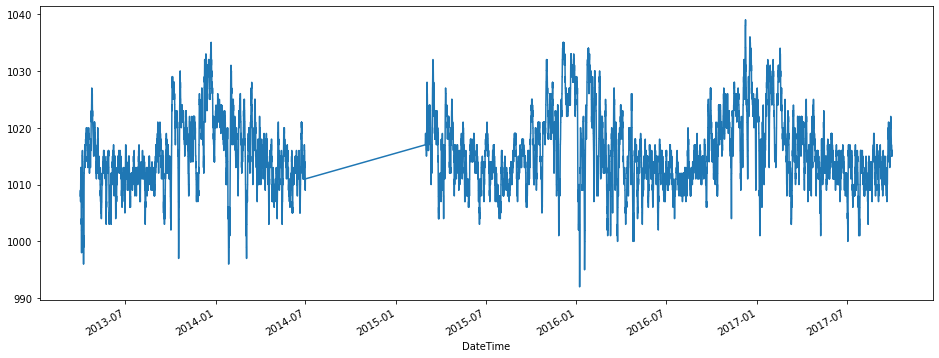

In [351]:
dataset["Pressure"].plot()
dataset["Pressure"].describe()

count    33427.000000
mean       127.031352
std        124.660498
min          0.000000
25%         13.000000
50%         80.000000
75%        209.000000
max        359.000000
Name: WindBearing, dtype: float64

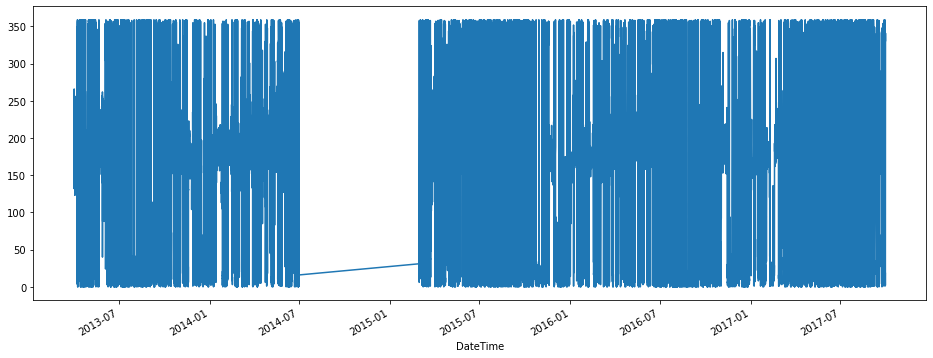

In [352]:
dataset["WindBearing"].plot()
dataset["WindBearing"].describe()

count    33427.000000
mean         3.042543
std          1.725600
min          0.000000
25%          1.720000
50%          2.750000
75%          4.110000
max         14.110000
Name: WindSpeed, dtype: float64

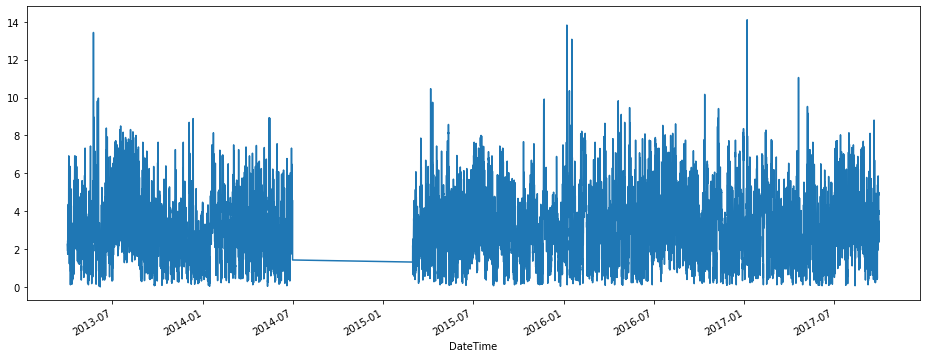

In [353]:
dataset["WindSpeed"].plot()
dataset["WindSpeed"].describe()

count    33427.000000
mean         0.366479
std          0.334842
min          0.000000
25%          0.042254
50%          0.274648
75%          0.690141
max          1.000000
Name: Prod, dtype: float64

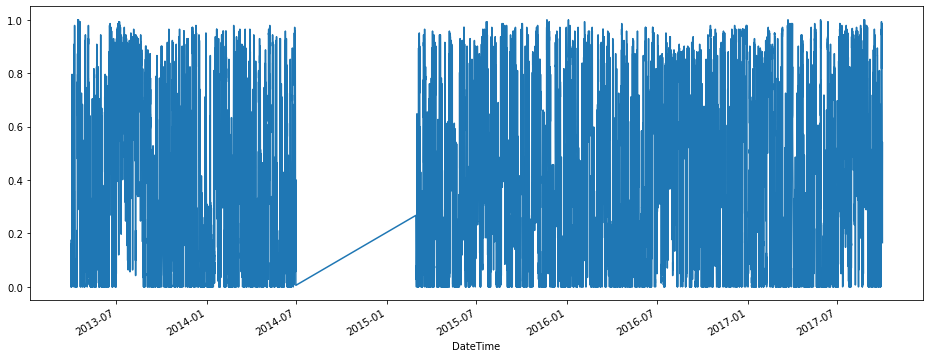

In [354]:
dataset["Prod"].plot()
dataset["Prod"].describe()

In [355]:
# SPECIFIC ROW PLOT

Temperature      15.90
CloudCover      100.00
Humidity         85.00
Pressure       1007.00
WindBearing     248.00
WindSpeed         2.08
Prod              0.00
Name: 2013-04-01 19:00:00, dtype: float64


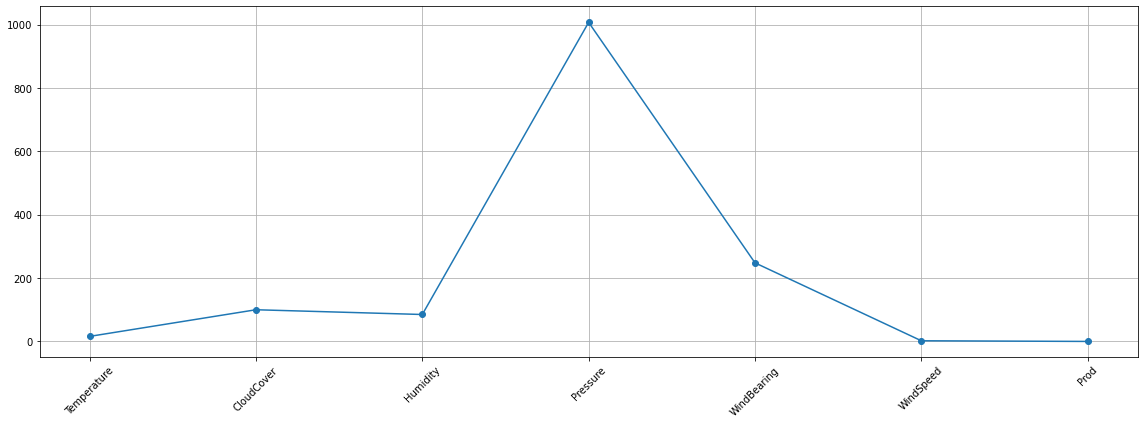

In [356]:
index = 16
row = dataset.iloc[index][0:7]
print(row)
#dataset.iloc[index][1:].plot(figsize=(15,8))
plt.plot(row.values, marker='o') 
plt.xticks(ticks=range(len(row.index)), labels=row.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [358]:
dataset

,Temperature,CloudCover,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos
DateTime,,,,,,,,,,,,,,,
2013-04-01 03:00:00,12.6,81.0,76.0,1008.0,245.0,1.94,0.028169,0.707107,7.071068e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
2013-04-01 04:00:00,13.0,91.0,78.0,1009.0,215.0,2.28,0.028169,0.866025,5.000000e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
2013-04-01 05:00:00,12.9,98.0,80.0,1009.0,194.0,2.17,0.021127,0.965926,2.588190e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
2013-04-01 06:00:00,12.7,100.0,81.0,1009.0,179.0,1.97,0.070423,1.000000,6.123234e-17,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
2013-04-01 07:00:00,13.0,96.0,80.0,1008.0,162.0,2.08,0.035211,0.965926,-2.588190e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30 19:00:00,15.5,100.0,95.0,1015.0,340.0,2.69,0.429577,-0.965926,2.588190e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16
2017-09-30 20:00:00,15.4,100.0,95.0,1016.0,341.0,2.69,0.542254,-0.866025,5.000000e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16
2017-09-30 21:00:00,15.3,100.0,94.0,1016.0,341.0,2.75,0.309859,-0.707107,7.071068e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16


In [275]:
# CHECK DUPLICATE ROWS IF EXISTS

In [359]:
duplicateRow = dataset[dataset.duplicated()]
print(duplicateRow)

Empty DataFrame
Columns: [Temperature, CloudCover, Humidity, Pressure, WindBearing, WindSpeed, Prod, Hour_sin, Hour_cos, Day_sin, Day_cos, Weekday_sin, Weekday_cos, Month_sin, Month_cos]
Index: []


In [ ]:
# Importing statsmodels to analyze and create lag features from wind power production [Prod] values 

In [360]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

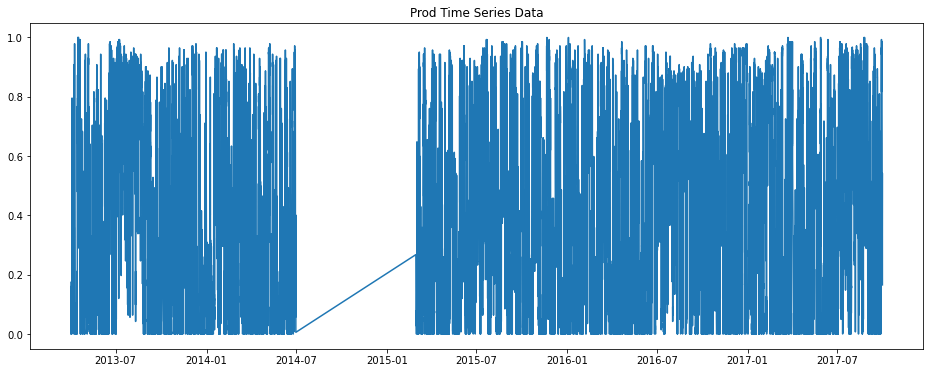

In [361]:
# Plot the time series
prod = dataset["Prod"]
plt.plot(prod)
plt.title("Prod Time Series Data")
plt.show()

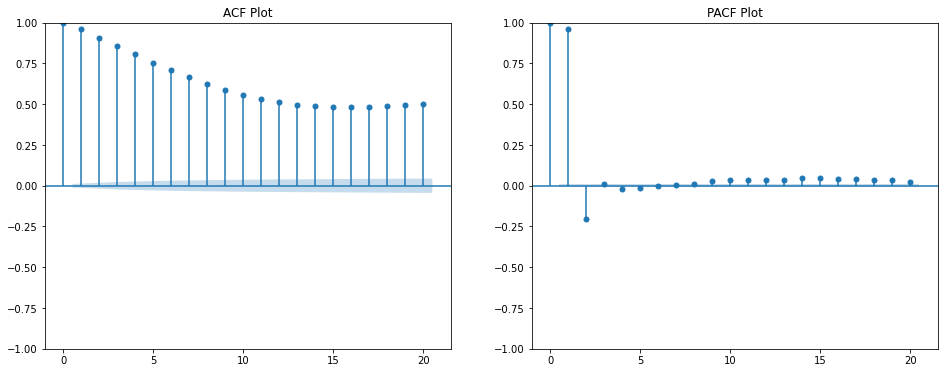

In [362]:
# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) 
# plot to visually select the optimal lag 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(prod, ax=axes[0], lags=20)
axes[0].set_title('ACF Plot')

plot_pacf(prod, ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF Plot')

plt.show()


In [ ]:
# Keep first if any duplicated records exist

In [363]:
dataset = dataset[~dataset.index.duplicated(keep='first')]

In [364]:
duplicates = dataset.index.duplicated()
print(f"Number of duplicated timestamps: {duplicates.sum()}")

Number of duplicated timestamps: 0


In [365]:
# Function to fit ARIMA models with different p (lags) and return Akaike Information Criterion (AIC) scores
from tqdm import tqdm
def select_best_lag(time_series, max_lag):
    aic_values = []
    
    for p in tqdm(range(1, max_lag + 1)):
        model = ARIMA(prod, order=(p, 0, 0)) 
        model_fit = model.fit()
        aic_values.append((p, model_fit.aic))
        
    return aic_values

prod = dataset['Prod'].asfreq('h')

max_lag = 5
aic_scores = select_best_lag(prod, max_lag)

for lag, aic in aic_scores:
    print(f'Lag: {lag}, AIC: {aic}')
    
optimum_lag = min(aic_scores, key=lambda x: x[1])[0]
print(f'\nOptimum Lag based on AIC: {optimum_lag}')

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.68s/it]

Lag: 1, AIC: -64684.40770986277
Lag: 2, AIC: -66144.05456162788
Lag: 3, AIC: -66146.52417752019
Lag: 4, AIC: -66158.26321314643
Lag: 5, AIC: -66162.3016612762

Optimum Lag based on AIC: 5


In [ ]:
# Lag feature Extraction

In [366]:
dataset = dataset.copy()
copy_original_dataset = dataset.copy()
for lag in range(1, optimum_lag+1):  # 1 to optimum lag
    dataset[f'Prod_lag_{lag}'] = dataset['Prod'].shift(lag)

In [367]:
dataset

,Temperature,CloudCover,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos,Prod_lag_1,Prod_lag_2,Prod_lag_3,Prod_lag_4,Prod_lag_5
DateTime,,,,,,,,,,,,,,,,,,,,
2013-04-01 03:00:00,12.6,81.0,76.0,1008.0,245.0,1.94,0.028169,0.707107,7.071068e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,NaN,NaN,NaN,NaN,NaN
2013-04-01 04:00:00,13.0,91.0,78.0,1009.0,215.0,2.28,0.028169,0.866025,5.000000e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.028169,NaN,NaN,NaN,NaN
2013-04-01 05:00:00,12.9,98.0,80.0,1009.0,194.0,2.17,0.021127,0.965926,2.588190e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.028169,0.028169,NaN,NaN,NaN
2013-04-01 06:00:00,12.7,100.0,81.0,1009.0,179.0,1.97,0.070423,1.000000,6.123234e-17,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.021127,0.028169,0.028169,NaN,NaN
2013-04-01 07:00:00,13.0,96.0,80.0,1008.0,162.0,2.08,0.035211,0.965926,-2.588190e-01,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.070423,0.021127,0.028169,0.028169,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30 19:00:00,15.5,100.0,95.0,1015.0,340.0,2.69,0.429577,-0.965926,2.588190e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16,0.366197,0.323944,0.401408,0.401408,0.302817
2017-09-30 20:00:00,15.4,100.0,95.0,1016.0,341.0,2.69,0.542254,-0.866025,5.000000e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16,0.429577,0.366197,0.323944,0.401408,0.401408
2017-09-30 21:00:00,15.3,100.0,94.0,1016.0,341.0,2.75,0.309859,-0.707107,7.071068e-01,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16,0.542254,0.429577,0.366197,0.323944,0.401408


In [368]:
dataset.dropna(inplace=True)
dataset.head(5)

,Temperature,CloudCover,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos,Prod_lag_1,Prod_lag_2,Prod_lag_3,Prod_lag_4,Prod_lag_5
DateTime,,,,,,,,,,,,,,,,,,,,
2013-04-01 08:00:00,14.2,100.0,77.0,1008.0,159.0,2.11,0.119718,8.660254e-01,-0.500000,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.035211,0.070423,0.021127,0.028169,0.028169
2013-04-01 09:00:00,15.1,97.0,76.0,1009.0,154.0,1.92,0.119718,7.071068e-01,-0.707107,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.119718,0.035211,0.070423,0.021127,0.028169
2013-04-01 10:00:00,15.2,99.0,78.0,1009.0,163.0,2.44,0.063380,5.000000e-01,-0.866025,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.119718,0.119718,0.035211,0.070423,0.021127
2013-04-01 11:00:00,15.6,100.0,79.0,1009.0,148.0,1.89,0.042254,2.588190e-01,-0.965926,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.063380,0.119718,0.119718,0.035211,0.070423
2013-04-01 12:00:00,16.0,99.0,77.0,1009.0,139.0,1.75,0.000000,1.224647e-16,-1.000000,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.042254,0.063380,0.119718,0.119718,0.035211


In [369]:
copy_original_dataset = dataset.copy()
copy_original_dataset.head(5)

,Temperature,CloudCover,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos,Prod_lag_1,Prod_lag_2,Prod_lag_3,Prod_lag_4,Prod_lag_5
DateTime,,,,,,,,,,,,,,,,,,,,
2013-04-01 08:00:00,14.2,100.0,77.0,1008.0,159.0,2.11,0.119718,8.660254e-01,-0.500000,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.035211,0.070423,0.021127,0.028169,0.028169
2013-04-01 09:00:00,15.1,97.0,76.0,1009.0,154.0,1.92,0.119718,7.071068e-01,-0.707107,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.119718,0.035211,0.070423,0.021127,0.028169
2013-04-01 10:00:00,15.2,99.0,78.0,1009.0,163.0,2.44,0.063380,5.000000e-01,-0.866025,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.119718,0.119718,0.035211,0.070423,0.021127
2013-04-01 11:00:00,15.6,100.0,79.0,1009.0,148.0,1.89,0.042254,2.588190e-01,-0.965926,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.063380,0.119718,0.119718,0.035211,0.070423
2013-04-01 12:00:00,16.0,99.0,77.0,1009.0,139.0,1.75,0.000000,1.224647e-16,-1.000000,0.201299,0.97953,0.0,1.0,0.866025,-0.5,0.042254,0.063380,0.119718,0.119718,0.035211


In [370]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Temperature', 'CloudCover', 'Pressure', 'WindBearing', 'Hour_sin', 'Hour_cos','Day_sin', 'Day_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin','Month_cos','Humidity']
features = dataset.drop(columns="Prod").reset_index(drop=True)
scaler = MinMaxScaler()
scaled_subset = scaler.fit_transform(features[cols_to_scale])
features_scaled = features.copy()
features_scaled[cols_to_scale] = scaled_subset
scaled_df = features_scaled
scaled_df

,Temperature,CloudCover,Humidity,Pressure,WindBearing,WindSpeed,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos,Prod_lag_1,Prod_lag_2,Prod_lag_3,Prod_lag_4,Prod_lag_5
0,0.491589,1.00,0.750000,0.340426,0.442897,2.11,0.933013,0.250000,0.600779,0.989739,0.5,1.000000,0.933013,0.25,0.035211,0.070423,0.021127,0.028169,0.028169
1,0.508411,0.97,0.739130,0.361702,0.428969,1.92,0.853553,0.146447,0.600779,0.989739,0.5,1.000000,0.933013,0.25,0.119718,0.035211,0.070423,0.021127,0.028169
2,0.510280,0.99,0.760870,0.361702,0.454039,2.44,0.750000,0.066987,0.600779,0.989739,0.5,1.000000,0.933013,0.25,0.119718,0.119718,0.035211,0.070423,0.021127
3,0.517757,1.00,0.771739,0.361702,0.412256,1.89,0.629410,0.017037,0.600779,0.989739,0.5,1.000000,0.933013,0.25,0.063380,0.119718,0.119718,0.035211,0.070423
4,0.525234,0.99,0.750000,0.361702,0.387187,1.75,0.500000,0.000000,0.600779,0.989739,0.5,1.000000,0.933013,0.25,0.042254,0.063380,0.119718,0.119718,0.035211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,0.515888,1.00,0.945652,0.489362,0.947075,2.69,0.017037,0.629410,0.399221,0.989739,0.0,0.356896,0.000000,0.50,0.366197,0.323944,0.401408,0.401408,0.302817
33416,0.514019,1.00,0.945652,0.510638,0.949861,2.69,0.066987,0.750000,0.399221,0.989739,0.0,0.356896,0.000000,0.50,0.429577,0.366197,0.323944,0.401408,0.401408
33417,0.512150,1.00,0.934783,0.510638,0.949861,2.75,0.146447,0.853553,0.399221,0.989739,0.0,0.356896,0.000000,0.50,0.542254,0.429577,0.366197,0.323944,0.401408
33418,0.500935,1.00,0.934783,0.510638,0.927577,3.11,0.250000,0.933013,0.399221,0.989739,0.0,0.356896,0.000000,0.50,0.309859,0.542254,0.429577,0.366197,0.323944


In [371]:
# Check for any negative values
(scaled_df < 0).any().any()

False

Temperature    0.409346
CloudCover     0.070000
Humidity       0.945652
Pressure       0.425532
WindBearing    0.518106
WindSpeed      2.420000
Hour_sin       0.500000
Hour_cos       1.000000
Day_sin        0.697431
Day_cos        0.959375
Weekday_sin    0.900969
Weekday_cos    0.801938
Month_sin      0.933013
Month_cos      0.250000
Prod_lag_1     0.007042
Prod_lag_2     0.000000
Prod_lag_3     0.000000
Prod_lag_4     0.000000
Prod_lag_5     0.000000
Name: 16, dtype: float64


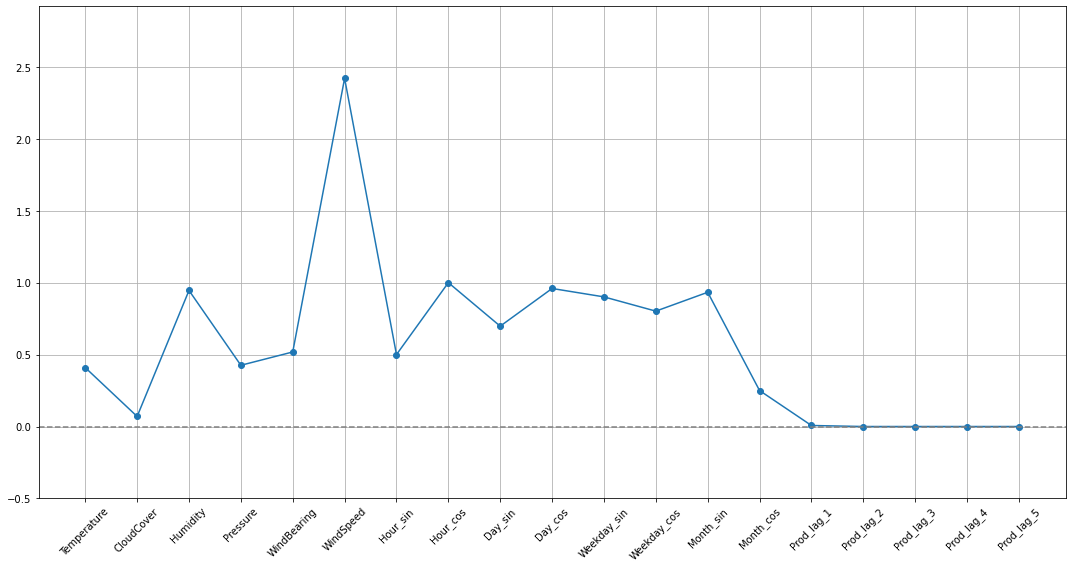

In [372]:
index = 16
row = scaled_df.iloc[index]
print(row)
plt.figure(figsize=(15, 8))
plt.plot(row.values, marker='o')
plt.xticks(ticks=range(len(row.index)), labels=row.index, rotation=45)
plt.axhline(0, color='gray', linestyle='--')  
plt.grid(True)
plt.ylim(row.min() - 0.5, row.max() + 0.5)   
plt.tight_layout()
plt.show()

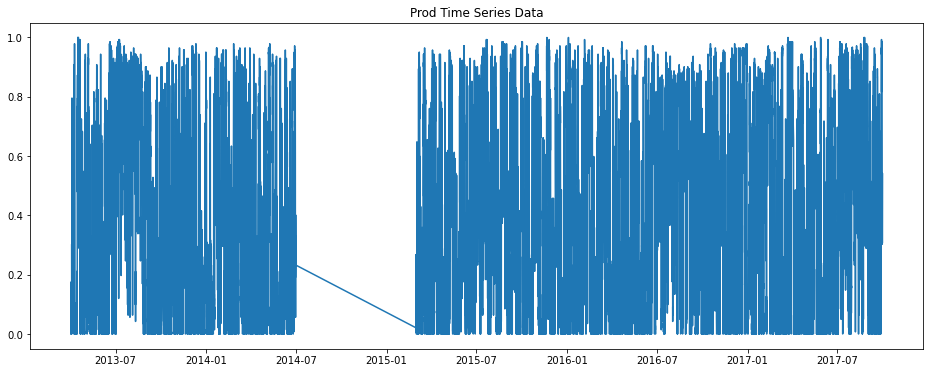

In [373]:
prod = dataset['Prod_lag_2']
plt.plot(prod)
plt.title("Prod Time Series Data")
plt.show()

In [ ]:
# Time Series Split approach for splitting data to train the models 

In [374]:
from sklearn.model_selection import TimeSeriesSplit
X = scaled_df
y = dataset["Prod"]
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 5567 5568 5569] TEST: [ 5570  5571  5572 ... 11137 11138 11139]
TRAIN: [    0     1     2 ... 11137 11138 11139] TEST: [11140 11141 11142 ... 16707 16708 16709]
TRAIN: [    0     1     2 ... 16707 16708 16709] TEST: [16710 16711 16712 ... 22277 22278 22279]
TRAIN: [    0     1     2 ... 22277 22278 22279] TEST: [22280 22281 22282 ... 27847 27848 27849]
TRAIN: [    0     1     2 ... 27847 27848 27849] TEST: [27850 27851 27852 ... 33417 33418 33419]


In [375]:
len(X_train), len(X_test)

(27850, 5570)

In [376]:
""" print(y_pred)""" 

' print(y_pred)'

In [377]:
print(y_test)

DateTime
2017-02-08 22:00:00    0.887324
2017-02-08 23:00:00    0.866197
2017-02-09 00:00:00    0.866197
2017-02-09 01:00:00    0.880282
2017-02-09 02:00:00    0.908451
                         ...   
2017-09-30 19:00:00    0.429577
2017-09-30 20:00:00    0.542254
2017-09-30 21:00:00    0.309859
2017-09-30 22:00:00    0.253521
2017-09-30 23:00:00    0.165493
Name: Prod, Length: 5570, dtype: float64


In [ ]:
# Training over multiple regression models to select the best one.

In [378]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm import tqdm
import numpy as np
import time

X = scaled_df.to_numpy()
y = dataset["Prod"].to_numpy()

tscv = TimeSeriesSplit(n_splits=5)

models_and_params = {
    'SVR': {
        'model': SVR(),
        'params': {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [3, 5, 10]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [50, 100], 'max_depth': [5, 10, 15]}
    },
    'XGBoost': {
        'model': XGBRegressor(verbosity=0),
        'params': {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.001, 0.01, 0.1]}
    }
}

best_overall_model = None
best_overall_score = float('inf')
best_model_name = ""
best_model_params = None

for model_name, config in models_and_params.items():
    print(f"\nEvaluating model: {model_name}")
    
    all_preds = []
    all_true = []
    fold = 1
    model_times = {}
    start_time = time.time()
    for train_index, test_index in tqdm(tscv.split(X), desc=f"Processing fold for {model_name}"):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = config['model']
        param_grid = config['params']

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=tscv,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        all_preds.extend(y_pred)
        all_true.extend(y_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"  Fold {fold} MSE: {mse:.4f}, R2: {r2:.4f}")
        fold += 1
    model_times[model_name] = time.time() - start_time
    overall_mse = mean_squared_error(all_true, all_preds)
    overall_r2 = r2_score(all_true, all_preds)
    print(f"{model_name} Overall MSE: {overall_mse:.4f}, R2: {overall_r2:.4f}")
    print(f"   Best Params: {grid_search.best_params_}")
    print(f"   Execution Time: {model_times[model_name]:.2f} seconds")

    if overall_mse < best_overall_score:
        best_overall_score = overall_mse
        best_overall_model = best_model
        best_model_name = model_name
        best_model_params = grid_search.best_params_

print("\nBest Overall Model:")
print(f"  Name: {best_model_name}")
print(f"  MSE: {best_overall_score:.4f}")
print(f"  Params: {best_model_params}")
for model, secs in model_times.items():
    print(f"  {model}: {secs:.2f} seconds")


Evaluating model: SVR


Processing fold for SVR: 1it [00:09,  9.51s/it]

  Fold 1 MSE: 0.0085, R2: 0.9116


Processing fold for SVR: 2it [00:41, 22.83s/it]

  Fold 2 MSE: 0.0078, R2: 0.9294


Processing fold for SVR: 3it [01:52, 44.71s/it]

  Fold 3 MSE: 0.0077, R2: 0.9281


Processing fold for SVR: 4it [04:05, 79.73s/it]

  Fold 4 MSE: 0.0065, R2: 0.9391


Processing fold for SVR: 5it [07:47, 93.46s/it] 


  Fold 5 MSE: 0.0076, R2: 0.9364
SVR Overall MSE: 0.0076, R2: 0.9316
   Best Params: {'C': 100, 'gamma': 0.001}
   Execution Time: 467.28 seconds

Evaluating model: Decision Tree


Processing fold for Decision Tree: 1it [00:00,  6.92it/s]

  Fold 1 MSE: 0.0096, R2: 0.9004


Processing fold for Decision Tree: 2it [00:00,  5.05it/s]

  Fold 2 MSE: 0.0088, R2: 0.9201


Processing fold for Decision Tree: 3it [00:00,  4.21it/s]

  Fold 3 MSE: 0.0080, R2: 0.9258


Processing fold for Decision Tree: 4it [00:01,  3.58it/s]

  Fold 4 MSE: 0.0074, R2: 0.9310


Processing fold for Decision Tree: 5it [00:01,  3.58it/s]


  Fold 5 MSE: 0.0085, R2: 0.9293
Decision Tree Overall MSE: 0.0084, R2: 0.9243
   Best Params: {'max_depth': 5}
   Execution Time: 1.40 seconds

Evaluating model: Random Forest


Processing fold for Random Forest: 1it [00:06,  6.07s/it]

  Fold 1 MSE: 0.0082, R2: 0.9151


Processing fold for Random Forest: 2it [00:17,  9.27s/it]

  Fold 2 MSE: 0.0081, R2: 0.9263


Processing fold for Random Forest: 3it [00:37, 14.17s/it]

  Fold 3 MSE: 0.0073, R2: 0.9324


Processing fold for Random Forest: 4it [01:04, 19.30s/it]

  Fold 4 MSE: 0.0064, R2: 0.9400


Processing fold for Random Forest: 5it [01:38, 19.66s/it]


  Fold 5 MSE: 0.0073, R2: 0.9388
Random Forest Overall MSE: 0.0075, R2: 0.9331
   Best Params: {'max_depth': 10, 'n_estimators': 100}
   Execution Time: 98.31 seconds

Evaluating model: XGBoost


Processing fold for XGBoost: 1it [00:01,  1.69s/it]

  Fold 1 MSE: 0.0081, R2: 0.9154


Processing fold for XGBoost: 2it [00:02,  1.46s/it]

  Fold 2 MSE: 0.0074, R2: 0.9326


Processing fold for XGBoost: 3it [00:04,  1.47s/it]

  Fold 3 MSE: 0.0071, R2: 0.9340


Processing fold for XGBoost: 4it [00:06,  1.58s/it]

  Fold 4 MSE: 0.0062, R2: 0.9415


Processing fold for XGBoost: 5it [00:08,  1.65s/it]

  Fold 5 MSE: 0.0070, R2: 0.9413
XGBoost Overall MSE: 0.0072, R2: 0.9355
   Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
   Execution Time: 8.26 seconds

Best Overall Model:
  Name: XGBoost
  MSE: 0.0072
  Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
  XGBoost: 8.26 seconds


In [ ]:
# Re-training the best selected model with the corresponding optimum hyperparameters

In [380]:
X = scaled_df.to_numpy()
y = dataset["Prod"].to_numpy()

model_classes = {
    'SVR': SVR,
    'Decision Tree': DecisionTreeRegressor,
    'Random Forest': RandomForestRegressor,
    'XGBoost': XGBRegressor,
}

ModelClass = model_classes[best_model_name]
optimum_params = {k.split("__")[-1]: v for k, v in best_model_params.items()}
clf = ModelClass(**optimum_params)

tscv = TimeSeriesSplit(n_splits=5)
all_preds = []
all_true = []
fold = 1

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    all_preds.extend(y_pred)
    all_true.extend(y_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Fold {fold} MSE: {mse:.4f}, R2: {r2:.4f}")
    fold += 1

overall_mse = mean_squared_error(all_true, all_preds)
overall_r2 = r2_score(all_true, all_preds)
print(f"\nFinal Evaluation with {best_model_name}")
print(f"Overall MSE: {overall_mse:.4f}")
print(f"Overall R2: {overall_r2:.4f}")

Fold 1 MSE: 0.0083, R2: 0.9134
Fold 2 MSE: 0.0074, R2: 0.9326
Fold 3 MSE: 0.0070, R2: 0.9345
Fold 4 MSE: 0.0062, R2: 0.9419
Fold 5 MSE: 0.0070, R2: 0.9413

Final Evaluation with XGBoost
Overall MSE: 0.0072
Overall R2: 0.9353


In [ ]:
# Calculation of accuracy score based on thresholded values [y_pred > 0.5, y_test > 0.5]

In [381]:
from sklearn.metrics import accuracy_score
y_pred = (y_pred > 0.5).astype(int)
y_test = (y_test > 0.5).astype(int)
print(accuracy_score(y_test, y_pred))

0.9436265709156194


In [ ]:
# Plotting true and predicted producion [Prod] values to check the alignment between them

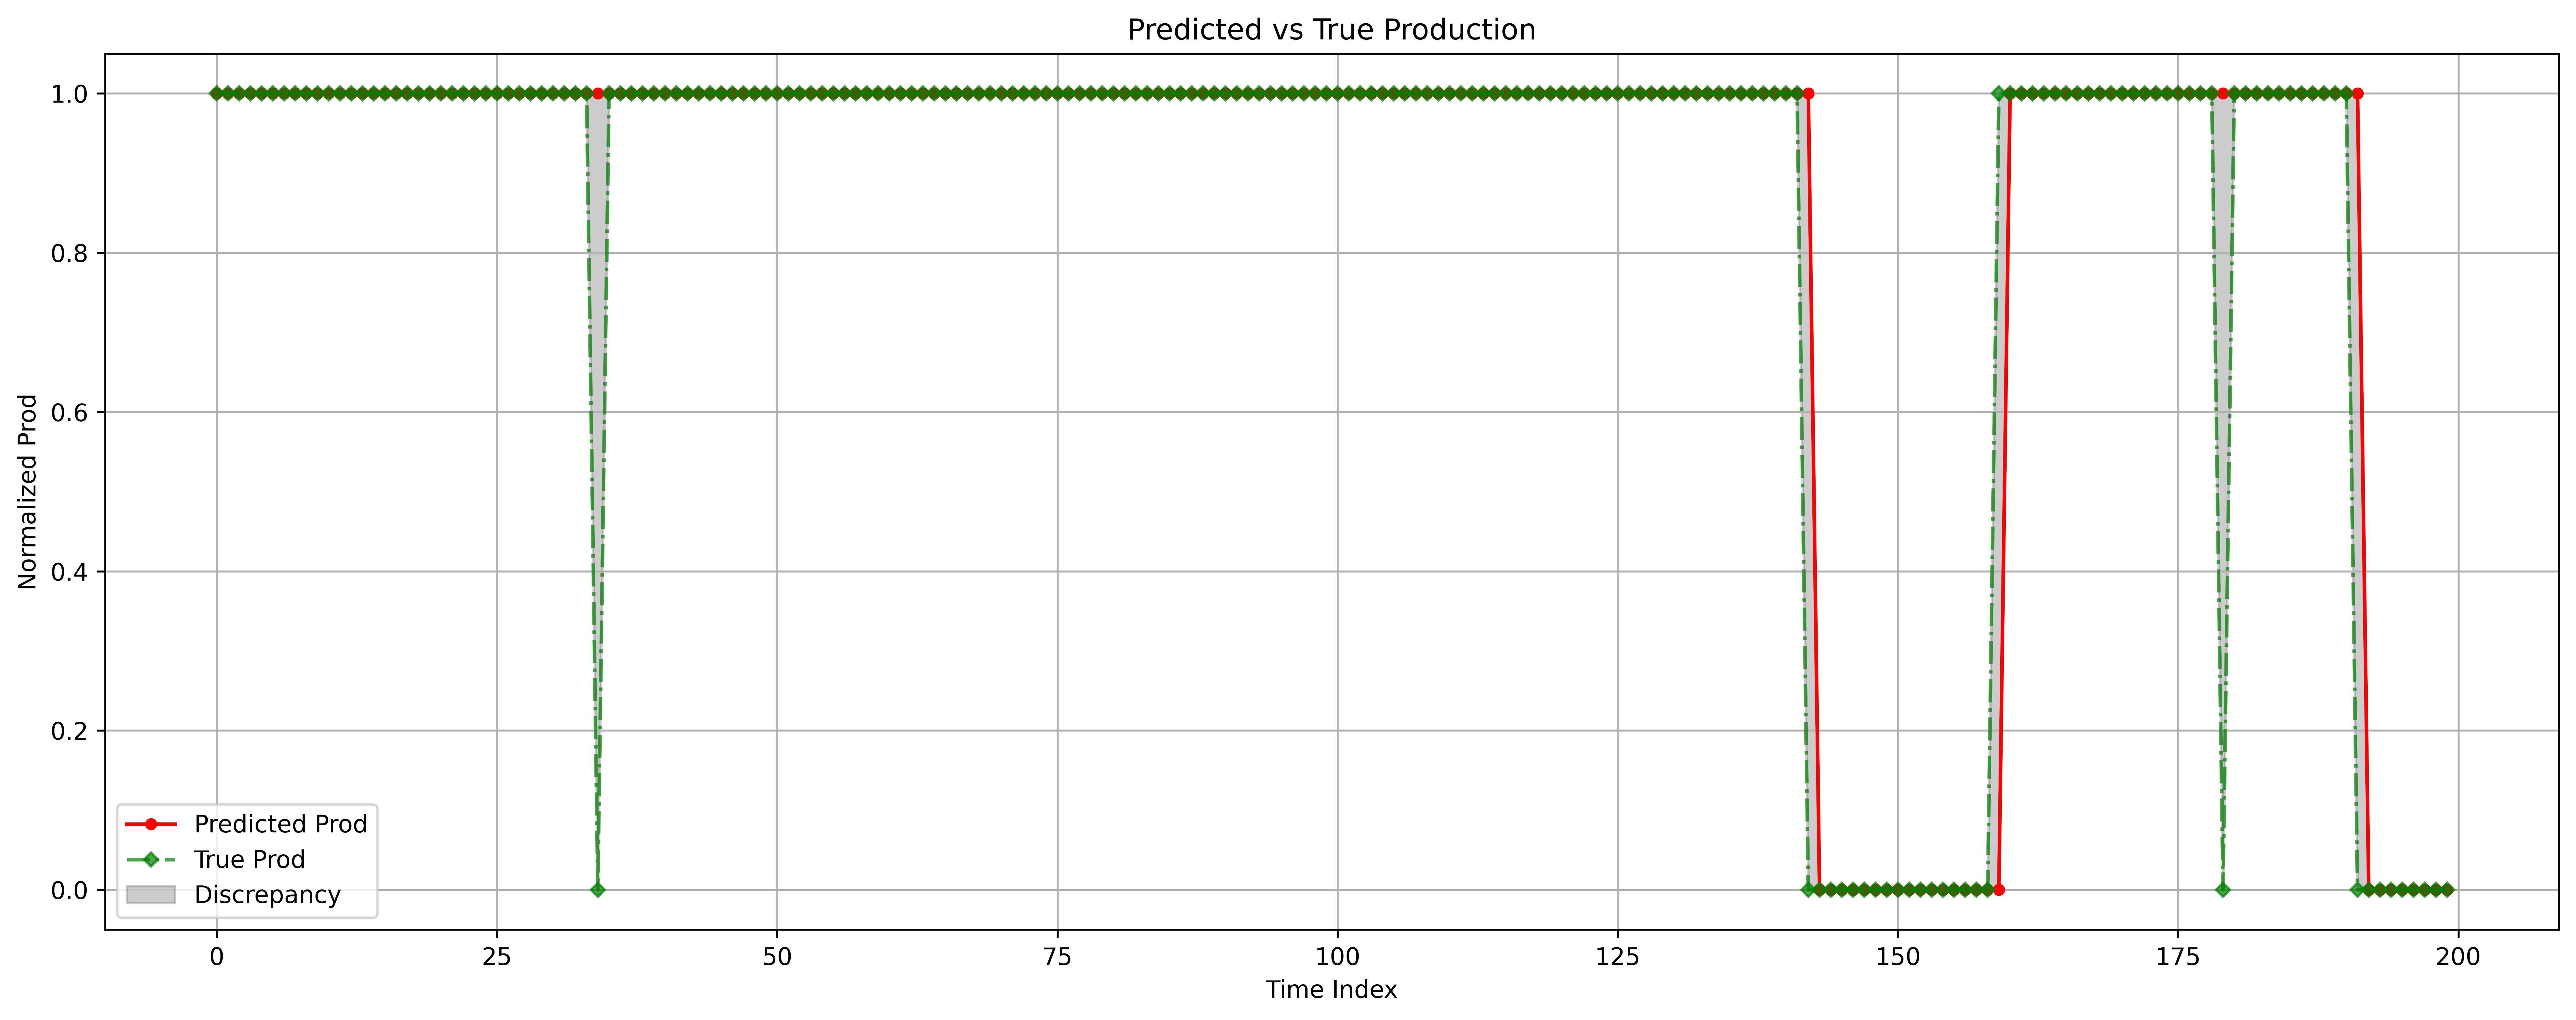

In [382]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(figsize=(15, 6), dpi=600)

ind = 200
diff = np.abs(y_pred[:ind] - y_test[:ind])

plt.plot(y_pred[:ind], "ro-", label="Predicted Prod", linewidth=1.5, markersize=4) 
plt.plot(y_test[:ind], "gD-.", label="True Prod", linewidth=1.5, markersize=4, alpha=0.7) 
plt.fill_between(range(ind), y_pred[:ind], y_test[:ind], color="gray", alpha=0.4, label="Discrepancy")
plt.title("Predicted vs True Production")
plt.xlabel("Time Index")
plt.ylabel("Normalized Prod")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [383]:
# TESTING EXTERNAL DATASET

In [384]:
copy_original_dataset

,Temperature,CloudCover,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos,Prod_lag_1,Prod_lag_2,Prod_lag_3,Prod_lag_4,Prod_lag_5
DateTime,,,,,,,,,,,,,,,,,,,,
2013-04-01 08:00:00,14.2,100.0,77.0,1008.0,159.0,2.11,0.119718,8.660254e-01,-0.500000,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.035211,0.070423,0.021127,0.028169,0.028169
2013-04-01 09:00:00,15.1,97.0,76.0,1009.0,154.0,1.92,0.119718,7.071068e-01,-0.707107,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.119718,0.035211,0.070423,0.021127,0.028169
2013-04-01 10:00:00,15.2,99.0,78.0,1009.0,163.0,2.44,0.063380,5.000000e-01,-0.866025,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.119718,0.119718,0.035211,0.070423,0.021127
2013-04-01 11:00:00,15.6,100.0,79.0,1009.0,148.0,1.89,0.042254,2.588190e-01,-0.965926,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.063380,0.119718,0.119718,0.035211,0.070423
2013-04-01 12:00:00,16.0,99.0,77.0,1009.0,139.0,1.75,0.000000,1.224647e-16,-1.000000,0.201299,0.97953,0.000000,1.000000,0.866025,-5.000000e-01,0.042254,0.063380,0.119718,0.119718,0.035211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30 19:00:00,15.5,100.0,95.0,1015.0,340.0,2.69,0.429577,-9.659258e-01,0.258819,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16,0.366197,0.323944,0.401408,0.401408,0.302817
2017-09-30 20:00:00,15.4,100.0,95.0,1016.0,341.0,2.69,0.542254,-8.660254e-01,0.500000,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16,0.429577,0.366197,0.323944,0.401408,0.401408
2017-09-30 21:00:00,15.3,100.0,94.0,1016.0,341.0,2.75,0.309859,-7.071068e-01,0.707107,-0.201299,0.97953,-0.974928,-0.222521,-1.000000,-1.836970e-16,0.542254,0.429577,0.366197,0.323944,0.401408


In [385]:
test_df = pd.read_csv("test.csv", parse_dates=["DateTime"])

In [ ]:
# # Cyclical Encoding for Timestamp-based feature extraction to test the model [inference]

In [386]:
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'], format='%m/%d/%Y %H:%M')
test_df.set_index('DateTime', inplace=True)
test_df['Hour'] = test_df.index.hour
test_df['Day'] = test_df.index.day
test_df['Weekday'] = test_df.index.dayofweek  # 0 = Monday
test_df['Month'] = test_df.index.month
test_df['Year'] = test_df.index.year

In [387]:
test_df = test_df.reset_index()
test_df

,DateTime,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour,Day,Weekday,Month,Year
0,2017-10-01 00:00:00,14.3,14.3,100,14.3,93,1016,331,2.86,NaN,0,1,6,10,2017
1,2017-10-01 01:00:00,14.1,14.1,100,14.1,93,1016,332,3.03,NaN,1,1,6,10,2017
2,2017-10-01 02:00:00,13.9,13.9,100,13.9,94,1016,334,3.11,NaN,2,1,6,10,2017
3,2017-10-01 03:00:00,13.7,13.7,100,13.7,93,1016,334,3.19,NaN,3,1,6,10,2017
4,2017-10-01 04:00:00,14.0,14.0,100,14.0,95,1016,325,3.08,NaN,4,1,6,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2018-01-31 19:00:00,3.6,5.1,0,3.6,88,1024,50,1.92,NaN,19,31,2,1,2018
2924,2018-01-31 20:00:00,2.7,3.9,0,2.7,89,1024,63,1.47,NaN,20,31,2,1,2018
2925,2018-01-31 21:00:00,3.1,3.1,0,3.1,90,1024,80,1.08,NaN,21,31,2,1,2018
2926,2018-01-31 22:00:00,2.8,2.8,0,2.8,89,1023,134,1.14,NaN,22,31,2,1,2018


In [388]:
test_df['Hour_sin'] = np.sin(2 * np.pi * test_df['Hour'] / 24)
test_df['Hour_cos'] = np.cos(2 * np.pi * test_df['Hour'] / 24)

test_df['Day_sin'] = np.sin(2 * np.pi * test_df['Day'] / 31)
test_df['Day_cos'] = np.cos(2 * np.pi * test_df['Day'] / 31)

test_df['Weekday_sin'] = np.sin(2 * np.pi * test_df['Weekday'] / 7)
test_df['Weekday_cos'] = np.cos(2 * np.pi * test_df['Weekday'] / 7)

test_df['Month_sin'] = np.sin(2 * np.pi * test_df['Month'] / 12)
test_df['Month_cos'] = np.cos(2 * np.pi * test_df['Month'] / 12)
test_df.drop(columns=['Hour', 'Day', 'Weekday', 'Month', 'Year'], inplace=True)
test_df

,DateTime,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos
0,2017-10-01 00:00:00,14.3,14.3,100,14.3,93,1016,331,2.86,NaN,0.000000,1.000000,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
1,2017-10-01 01:00:00,14.1,14.1,100,14.1,93,1016,332,3.03,NaN,0.258819,0.965926,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
2,2017-10-01 02:00:00,13.9,13.9,100,13.9,94,1016,334,3.11,NaN,0.500000,0.866025,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
3,2017-10-01 03:00:00,13.7,13.7,100,13.7,93,1016,334,3.19,NaN,0.707107,0.707107,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
4,2017-10-01 04:00:00,14.0,14.0,100,14.0,95,1016,325,3.08,NaN,0.866025,0.500000,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2018-01-31 19:00:00,3.6,5.1,0,3.6,88,1024,50,1.92,NaN,-0.965926,0.258819,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025
2924,2018-01-31 20:00:00,2.7,3.9,0,2.7,89,1024,63,1.47,NaN,-0.866025,0.500000,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025
2925,2018-01-31 21:00:00,3.1,3.1,0,3.1,90,1024,80,1.08,NaN,-0.707107,0.707107,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025
2926,2018-01-31 22:00:00,2.8,2.8,0,2.8,89,1023,134,1.14,NaN,-0.500000,0.866025,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025


In [389]:
n_lags = optimum_lag # 5
initial_lags = copy_original_dataset['Prod'].dropna().iloc[-n_lags:].tolist()
initial_lags

[0.429577465, 0.542253521, 0.309859155, 0.253521127, 0.165492958]

In [390]:
weather_features = [
    'Temperature', 'CloudCover', 'Humidity', 'Pressure',
    'WindBearing', 'WindSpeed', 'Hour_sin', 'Hour_cos','Day_sin', 'Day_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin','Month_cos']

all_features = [
    'DateTime', 'Temperature', 'CloudCover', 'Humidity', 'Pressure',
    'WindBearing', 'WindSpeed', 'Hour_sin', 'Hour_cos','Day_sin', 'Day_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin','Month_cos']
clean_test_df = test_df[weather_features]
all_clean_test_df = test_df[all_features]
clean_test_df

,Temperature,CloudCover,Humidity,Pressure,WindBearing,WindSpeed,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos
0,14.3,100,93,1016,331,2.86,0.000000,1.000000,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
1,14.1,100,93,1016,332,3.03,0.258819,0.965926,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
2,13.9,100,94,1016,334,3.11,0.500000,0.866025,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
3,13.7,100,93,1016,334,3.19,0.707107,0.707107,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
4,14.0,100,95,1016,325,3.08,0.866025,0.500000,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,5.1,0,88,1024,50,1.92,-0.965926,0.258819,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025
2924,3.9,0,89,1024,63,1.47,-0.866025,0.500000,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025
2925,3.1,0,90,1024,80,1.08,-0.707107,0.707107,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025
2926,2.8,0,89,1023,134,1.14,-0.500000,0.866025,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025


In [ ]:
# Scaling the related features to feed the training model.

In [391]:
#cols_to_scale = ['Temperature', 'CloudCover', 'Pressure', 'WindBearing', 'Hour', 'Humidity']
cols_to_scale = ['Temperature', 'CloudCover','Humidity', 'Pressure', 'WindBearing', 'Hour_sin', 'Hour_cos','Day_sin', 'Day_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin','Month_cos']
scaler = MinMaxScaler()
features_scaled = clean_test_df.copy()
features_scaled[cols_to_scale] = scaler.fit_transform(clean_test_df[cols_to_scale])
scaled_test_df = features_scaled
scaled_test_df

,Temperature,CloudCover,Humidity,Pressure,WindBearing,WindSpeed,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos
0,0.581470,1.0,0.914634,0.575,0.922006,2.86,0.500000,1.000000,0.600779,0.989739,0.099031,0.801938,0.0,0.000000
1,0.575080,1.0,0.914634,0.575,0.924791,3.03,0.629410,0.982963,0.600779,0.989739,0.099031,0.801938,0.0,0.000000
2,0.568690,1.0,0.926829,0.575,0.930362,3.11,0.750000,0.933013,0.600779,0.989739,0.099031,0.801938,0.0,0.000000
3,0.562300,1.0,0.914634,0.575,0.930362,3.19,0.853553,0.853553,0.600779,0.989739,0.099031,0.801938,0.0,0.000000
4,0.571885,1.0,0.939024,0.575,0.905292,3.08,0.933013,0.750000,0.600779,0.989739,0.099031,0.801938,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,0.287540,0.0,0.853659,0.775,0.139276,1.92,0.017037,0.629410,0.500000,1.000000,1.000000,0.356896,1.0,0.732051
2924,0.249201,0.0,0.865854,0.775,0.175487,1.47,0.066987,0.750000,0.500000,1.000000,1.000000,0.356896,1.0,0.732051
2925,0.223642,0.0,0.878049,0.775,0.222841,1.08,0.146447,0.853553,0.500000,1.000000,1.000000,0.356896,1.0,0.732051
2926,0.214058,0.0,0.865854,0.750,0.373259,1.14,0.250000,0.933013,0.500000,1.000000,1.000000,0.356896,1.0,0.732051


In [ ]:
# Producing lag features based on the last 5 lags created in original dataset for inference.

In [392]:
n_lags = 5
predicted_prods = []
lag_buffer = initial_lags.copy()

for i in range(len(test_df)):
    weather_row = scaled_test_df.iloc[i][weather_features]

    lag_features = {f'Prod_lag_{j+1}': lag_buffer[-(j+1)] for j in range(n_lags)}
    input_row = pd.DataFrame([{**lag_features, **weather_row.to_dict()}])

    pred = clf.predict(input_row.values)[0]
    predicted_prods.append(pred)

    lag_buffer.append(pred)

In [393]:
test_df['Predicted_Prod'] = predicted_prods
test_df.to_csv("recursive_forecast_output.csv", index=False)
test_df

,DateTime,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod,Hour_sin,Hour_cos,Day_sin,Day_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos,Predicted_Prod
0,2017-10-01 00:00:00,14.3,14.3,100,14.3,93,1016,331,2.86,NaN,0.000000,1.000000,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000,0.753526
1,2017-10-01 01:00:00,14.1,14.1,100,14.1,93,1016,332,3.03,NaN,0.258819,0.965926,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000,0.739472
2,2017-10-01 02:00:00,13.9,13.9,100,13.9,94,1016,334,3.11,NaN,0.500000,0.866025,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000,0.726378
3,2017-10-01 03:00:00,13.7,13.7,100,13.7,93,1016,334,3.19,NaN,0.707107,0.707107,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000,0.712940
4,2017-10-01 04:00:00,14.0,14.0,100,14.0,95,1016,325,3.08,NaN,0.866025,0.500000,2.012985e-01,0.97953,-0.781831,0.623490,-0.866025,0.500000,0.761182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2018-01-31 19:00:00,3.6,5.1,0,3.6,88,1024,50,1.92,NaN,-0.965926,0.258819,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025,0.720936
2924,2018-01-31 20:00:00,2.7,3.9,0,2.7,89,1024,63,1.47,NaN,-0.866025,0.500000,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025,0.720936
2925,2018-01-31 21:00:00,3.1,3.1,0,3.1,90,1024,80,1.08,NaN,-0.707107,0.707107,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025,0.720936
2926,2018-01-31 22:00:00,2.8,2.8,0,2.8,89,1023,134,1.14,NaN,-0.500000,0.866025,-2.449294e-16,1.00000,0.974928,-0.222521,0.500000,0.866025,0.720936


In [394]:
empty_rows = copy_dataset_inference[copy_dataset_inference.isna().all(axis=1)]
print(f"Number of fully empty rows: {len(empty_rows)}")
print(f"Original shape of dataaset:", copy_dataset_inference.shape)
copy_dataset_inference.dropna(how='all', inplace=True)
print(f"True shape after removing nans:", copy_dataset_inference.shape)
copy_dataset_inference

Number of fully empty rows: 2928
Original shape of dataaset: (36355, 10)
True shape after removing nans: (33427, 10)


,DateTime,AppTemperature,Temperature,CloudCover,DewPoint,Humidity,Pressure,WindBearing,WindSpeed,Prod
0,4/1/2013 03:00,12.6,12.6,81.0,12.6,76.0,1008.0,245.0,1.94,0.028169
1,4/1/2013 04:00,13.0,13.0,91.0,13.0,78.0,1009.0,215.0,2.28,0.028169
2,4/1/2013 05:00,12.9,12.9,98.0,12.9,80.0,1009.0,194.0,2.17,0.021127
3,4/1/2013 06:00,12.7,12.7,100.0,12.7,81.0,1009.0,179.0,1.97,0.070423
4,4/1/2013 07:00,13.0,13.0,96.0,13.0,80.0,1008.0,162.0,2.08,0.035211
...,...,...,...,...,...,...,...,...,...,...
33422,9/30/2017 19:00,15.5,15.5,100.0,15.5,95.0,1015.0,340.0,2.69,0.429577
33423,9/30/2017 20:00,15.4,15.4,100.0,15.4,95.0,1016.0,341.0,2.69,0.542254
33424,9/30/2017 21:00,15.3,15.3,100.0,15.3,94.0,1016.0,341.0,2.75,0.309859
33425,9/30/2017 22:00,14.7,14.7,100.0,14.7,94.0,1016.0,333.0,3.11,0.253521


In [395]:
print(predicted_prods)

[0.75352585, 0.73947173, 0.7263776, 0.71294004, 0.7611824, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.7718322, 0.75927305, 0.7718322, 0.75927305, 0.71384513, 0.71384513, 0.71384513, 0.7264043, 0.71384513, 0.69605124, 0.6888164, 0.69703573, 0.6976512, 0.7264043, 0.7264043, 0.7264043, 0.7102104, 0.7264043, 0.7264043, 0.7264043, 0.71384513, 0.7264043, 0.7264043, 0.7264043, 0.70427054, 0.71951103, 0.71951103, 0.71951103, 0.7796978, 0.7796978, 0.7796978, 0.7796978, 0.7613117, 0.7601839, 0.7644573, 0.7703971, 0.7755831, 0.7755831, 0.76229185, 0.7634197, 0.7634197, 0.7634197, 0.7634197, 0.7634197, 0.78180575, 0.78180575, 0.78180575, 0.7714785, 0.7714785, 0.7865877, 0.7865877, 0.7865877, 0.70134604, 0.68979496, 0.6966849, 0.6966849, 0.6966849, 0.68979496, 0.68979496, 0.68979496, 0.68979496, 0.6942558, 0.71315384, 0.7315399, 0.7303799, 0.7303799, 0.7303799, 0.7303799, 0.73

In [396]:
actual_df = copy_dataset_inference[['DateTime', 'Prod']].dropna()
forecast_df = pd.concat([all_clean_test_df["DateTime"], test_df["Predicted_Prod"]], axis=1).dropna()

In [397]:
actual_df

,DateTime,Prod
0,4/1/2013 03:00,0.028169
1,4/1/2013 04:00,0.028169
2,4/1/2013 05:00,0.021127
3,4/1/2013 06:00,0.070423
4,4/1/2013 07:00,0.035211
...,...,...
33422,9/30/2017 19:00,0.429577
33423,9/30/2017 20:00,0.542254
33424,9/30/2017 21:00,0.309859
33425,9/30/2017 22:00,0.253521


In [398]:
forecast_df

,DateTime,Predicted_Prod
0,2017-10-01 00:00:00,0.753526
1,2017-10-01 01:00:00,0.739472
2,2017-10-01 02:00:00,0.726378
3,2017-10-01 03:00:00,0.712940
4,2017-10-01 04:00:00,0.761182
...,...,...
2923,2018-01-31 19:00:00,0.720936
2924,2018-01-31 20:00:00,0.720936
2925,2018-01-31 21:00:00,0.720936
2926,2018-01-31 22:00:00,0.720936


In [399]:
forecast_df.min(),forecast_df.max()

(DateTime          2017-10-01 00:00:00
 Predicted_Prod               0.004232
 dtype: object,
 DateTime          2018-01-31 23:00:00
 Predicted_Prod               0.894044
 dtype: object)

In [ ]:
# Plotting the forecasted production values.

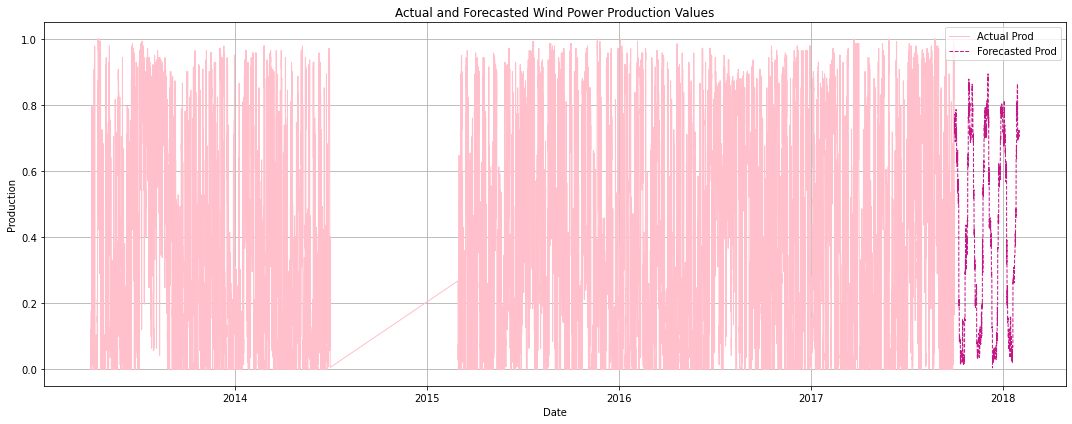

In [400]:
actual_df['DateTime'] = pd.to_datetime(actual_df['DateTime'])
forecast_df['DateTime'] = pd.to_datetime(forecast_df['DateTime'])

plt.figure(figsize=(15, 6))

plt.plot(actual_df['DateTime'].to_numpy(),actual_df['Prod'].to_numpy(),label='Actual Prod',linewidth=1,color='pink')
plt.plot(forecast_df['DateTime'].to_numpy(),forecast_df['Predicted_Prod'].to_numpy(),label='Forecasted Prod',linewidth=1,linestyle='--',color='#C71585')

plt.title('Actual and Forecasted Wind Power Production Values')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('forecasted.png', dpi=600, bbox_inches='tight')
plt.show()